# COVID-Team-1
## Dr. Mohanty
## Katelynn Urgitus
## CSC 405-01
## Last Updated: 10/24/2020
## I, Katelynn Urgitus, have abided by the UNCG Academic Integrity Policy.

### ---------------------------------------------------------------------------------------------------------------------------------

In this notebook I will be:

generating weekly stats for Pennsylvania,

comparing that data against 5 other states,

identifying counties in PA that have high cases and deaths, and

plotting that data

### ---------------------------------------------------------------------------------------------------------------------------------

In [1]:
import os 
os.chdir("../")

In [2]:
import ipynb
from ipynb.fs.full import covid_data as cd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Telling pandas not convert to html tags.
pd.set_option('display.html.table_schema', True)
# Max columns and rows to display.
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 7)

### Data Paths For Pennsylvania

In [4]:
penn_daily_cases = "../data/Covid/Kat/Pennsylvania/Penn_Cases.csv"
penn_daily_deaths = "../data/Covid/Kat/Pennsylvania/Penn_Deaths.csv"
penn_pop = "../data/Covid/Kat/Pennsylvania/Penn_Pop_By_County.csv"
daily_penn_cases_normalized = "../data/Covid/Kat/Pennsylvania/daily_Penn_cases_normalized.csv"
daily_penn_deaths_normalized = "../data/Covid/Kat/Pennsylvania/daily_Penn_deaths_normalized.csv"
penn_weekly_cases = "../data/Covid/Kat/Pennsylvania/weekly_Penn_Cases.csv"
penn_weekly_deaths = "../data/Covid/Kat/Pennsylvania/weekly_Penn_Deaths.csv"
weekly_penn_cases_normalized = "../data/Covid/Kat/Pennsylvania/weekly_Penn_cases_normalized.csv"
weekly_penn_deaths_normalized = "../data/Covid/Kat/Pennsylvania/weekly_Penn_deaths_normalized.csv"
top_5_cases = "../data/Covid/Kat/Pennsylvania/top_5_cases_normalized.csv"
top_5_deaths = "../data/Covid/Kat/Pennsylvania/top_5_deaths_normalized.csv"

### Prep For Daily Trends

In [5]:
# Starting with cases
# Getting the population by county
population_county = pd.read_csv(penn_pop)
population_county.set_index("County Name", inplace=True)

# Creating the cases by county variable
cases_county = pd.read_csv(penn_daily_cases)
cases_county.set_index("County Name", inplace=True)

# Creating the data frame to store these values
df_penn_cases = pd.DataFrame(index = [cases_county.index])

# Calculating the number of days based on the number of cases 
# (Note: If the year changes, this will need to be updated or appended)
num_of_days = len(cases_county.filter(regex = "2020").columns)

# Setting up our coulumns for the data frame
for day in range(-1, -num_of_days, -1):
    column_name = cases_county.columns[day]
    column_value = cases_county.iloc[:, day].sub(cases_county.iloc[:, day - 1]).values
    df_penn_cases.insert(0, column_name, column_value)
    
# Normalizing the data based on population
counties = cases_county.index
for county in counties:
    population = population_county.loc[county,"population"]
    df_penn_cases.loc[county, :] = \
    df_penn_cases.loc[county, :].apply(lambda x: round(((x / population) * 100000), 0)).values
    
# Setting up the key value pairs to be input into the data frame    
_column_name = cases_county.columns[0]
_column_value = cases_county.iloc[:, 0:1].apply(lambda x: round(((x / population) * 100000), 0)).values

# Inserting the data
df_penn_cases.insert(0, _column_name, _column_value)

# Converting to a csv file
df_penn_cases.to_csv(daily_penn_cases_normalized, mode='w', index = True, header=True)

In [6]:
# Moving to set up the deaths
# Since we have already established the pop by county, i do not need to state it again

# Creating the deaths by county variable
deaths_county = pd.read_csv(penn_daily_deaths)
deaths_county.set_index("County Name", inplace=True)

# Creating the data frame to store these values
df_penn_deaths = pd.DataFrame(index = [deaths_county.index])

# Calculating the number of days based on the number of deaths 
# (Note: If the year changes, this will need to be updated or appended)
num_of_days = len(deaths_county.filter(regex = "2020").columns)

# Setting up our coulumns for the data frame
for day in range(-1, -num_of_days, -1):
    column_name = deaths_county.columns[day]
    column_value = deaths_county.iloc[:, day].sub(deaths_county.iloc[:, day - 1]).values
    df_penn_deaths.insert(0, column_name, column_value)
    
# Normalizing the data based on population
counties = deaths_county.index
for county in counties:
    population = population_county.loc[county,"population"]
    df_penn_deaths.loc[county, :] = \
    df_penn_deaths.loc[county, :].apply(lambda x: round(((x / population) * 100000), 0)).values
    
# Setting up the key value pairs to be input into the data frame    
_column_name = deaths_county.columns[0]
_column_value = deaths_county.iloc[:, 0:1].apply(lambda x: round(((x / population) * 100000), 0)).values

# Inserting the data
df_penn_deaths.insert(0, _column_name, _column_value)

# Converting to a csv file
df_penn_deaths.to_csv(daily_penn_deaths_normalized, mode='w', index = True, header=True)

### Prep For Weekly Trends

In [7]:
num_of_days = len(cases_county.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in cases_county.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_penn_weekly_cases = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["cases"])
for county in cases_county.index.values:
    for column in range(0, cases_county.shape[1], 7):
        df_penn_weekly_cases.loc[(county, "week " + str((column // 7) + 1))] = \
            cases_county.loc[county].iloc[column:column + 7].sum()
df_penn_weekly_cases.to_csv(penn_weekly_cases)

In [8]:
df_penn_weekly_cases_normalized = pd.read_csv(penn_weekly_cases, index_col=[0, 1])

# Normalizing cases to 100,000.
for county in df_penn_weekly_cases_normalized.index.get_level_values(0).unique():
    population = population_county.loc[county,"population"]
    df_penn_weekly_cases_normalized.loc[county, :] = \
    df_penn_weekly_cases_normalized.loc[county, :].apply(lambda x: round(((x / population) * 100000), 0)).values

df_weekly_cases_normalized = pd.DataFrame(index = [df_penn_weekly_cases_normalized.index.get_level_values(0).unique()],\
                                   columns = ["mean", "median", "mode"])
for county in df_penn_weekly_cases_normalized.index.get_level_values(0).unique():
    df_weekly_cases_normalized.loc[county, "mean"] = df_penn_weekly_cases_normalized.loc[county].mean()[0]
    df_weekly_cases_normalized.loc[county, "median"] = df_penn_weekly_cases_normalized.loc[county].median()[0]
    df_weekly_cases_normalized.loc[county, "mode"] = df_penn_weekly_cases_normalized.loc[county].mode().values[0,0]
df_weekly_cases_normalized.to_csv(weekly_penn_cases_normalized)

In [9]:
num_of_days = len(deaths_county.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in deaths_county.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_penn_weekly_deaths = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["cases"])
for county in deaths_county.index.values:
    for column in range(0, deaths_county.shape[1], 7):
        df_penn_weekly_deaths.loc[(county, "week " + str((column // 7) + 1))] = \
            deaths_county.loc[county].iloc[column:column + 7].sum()
df_penn_weekly_deaths.to_csv(penn_weekly_deaths)

In [10]:
df_penn_weekly_deaths_normalized = pd.read_csv(penn_weekly_deaths, index_col=[0, 1])

# Normalizing cases to 100,000.
for county in df_penn_weekly_deaths_normalized.index.get_level_values(0).unique():
    population = population_county.loc[county,"population"]
    df_penn_weekly_deaths_normalized.loc[county, :] = \
    df_penn_weekly_deaths_normalized.loc[county, :].apply(lambda x: round(((x / population) * 100000), 0)).values

df_weekly_deaths_normalized = pd.DataFrame(index = [df_penn_weekly_deaths_normalized.index.get_level_values(0).unique()],\
                                   columns = ["mean", "median", "mode"])
for county in df_penn_weekly_deaths_normalized.index.get_level_values(0).unique():
    df_weekly_deaths_normalized.loc[county, "mean"] = df_penn_weekly_deaths_normalized.loc[county].mean()[0]
    df_weekly_deaths_normalized.loc[county, "median"] = df_penn_weekly_deaths_normalized.loc[county].median()[0]
    df_weekly_deaths_normalized.loc[county, "mode"] = df_penn_weekly_deaths_normalized.loc[county].mode().values[0,0]
df_weekly_deaths_normalized.to_csv(weekly_penn_deaths_normalized)

## Generate Statistics For Pennsylvania

In [11]:
display(df_penn_cases)

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,9/12/2020,9/13/2020,9/14/2020,9/15/2020,9/16/2020
County Name,,,,,,,,,,,
Adams County,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,8.0,7.0,9.0
Allegheny County,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,12.0,7.0,6.0
Armstrong County,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,6.0,3.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
Westmoreland County,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,7.0,2.0,3.0
Wyoming County,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0
York County,0.0,0.0,0.0,0.0,0.0,...,29.0,0.0,20.0,9.0,17.0


In [12]:
display(df_penn_deaths)

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,9/12/2020,9/13/2020,9/14/2020,9/15/2020,9/16/2020
County Name,,,,,,,,,,,
Adams County,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0
Allegheny County,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
Armstrong County,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
Westmoreland County,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
Wyoming County,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
York County,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [13]:
display(df_weekly_cases_normalized)

,mean,median,mode
Adams County,1597.49,1250,0
Allegheny County,1836.2,940,0
Armstrong County,952.686,619,0
...,...,...,...
Westmoreland County,1231.89,853,0
Wyoming County,734.686,754,0
York County,1805.63,1304,0


In [14]:
display(df_weekly_deaths_normalized)

,mean,median,mode
Adams County,55.7714,34,0
Allegheny County,71.9714,82,0
Armstrong County,39.6,23,0
...,...,...,...
Westmoreland County,49.0286,68,0
Wyoming County,102.629,97,0
York County,57.9714,30,0


### Compare to 5 other states

For my 5 other states, I will be choosing:

Texas

California

Washington

Colorado

Tennessee

#### Data Paths for States

In [15]:
tx_daily_cases = "../data/Covid/Kat/Texas/TX_Cases.csv"
tx_daily_deaths = "../data/Covid/Kat/Texas/TX_Deaths.csv"
tx_pop = "../data/Covid/Kat/Texas/TX_Pop_By_County.csv"
tx_weekly_cases = "../data/Covid/Kat/Texas/weekly_TX_Cases.csv"
tx_weekly_deaths = "../data/Covid/Kat/Texas/weekly_TX_Deaths.csv"
weekly_tx_cases_normalized = "../data/Covid/Kat/Texas/weekly_TX_cases_normalized.csv"
weekly_tx_deaths_normalized = "../data/Covid/Kat/Texas/weekly_TX_deaths_normalized.csv"

ca_daily_cases = "../data/Covid/Kat/California/CA_Cases.csv"
ca_daily_deaths = "../data/Covid/Kat/California/CA_Deaths.csv"
ca_pop = "../data/Covid/Kat/California/CA_Pop_By_County.csv"
ca_weekly_cases = "../data/Covid/Kat/California/weekly_CA_Cases.csv"
ca_weekly_deaths = "../data/Covid/Kat/California/weekly_CA_Deaths.csv"
weekly_ca_cases_normalized = "../data/Covid/Kat/California/weekly_CA_cases_normalized.csv"
weekly_ca_deaths_normalized = "../data/Covid/Kat/California/weekly_CA_deaths_normalized.csv"

wa_daily_cases = "../data/Covid/Kat/Washington/WA_Cases.csv"
wa_daily_deaths = "../data/Covid/Kat/Washington/WA_Deaths.csv"
wa_pop = "../data/Covid/Kat/Washington/WA_Pop_By_County.csv"
wa_weekly_cases = "../data/Covid/Kat/Washington/weekly_WA_Cases.csv"
wa_weekly_deaths = "../data/Covid/Kat/Washington/weekly_WA_Deaths.csv"
weekly_wa_cases_normalized = "../data/Covid/Kat/Washington/weekly_WA_cases_normalized.csv"
weekly_wa_deaths_normalized = "../data/Covid/Kat/Washington/weekly_WA_deaths_normalized.csv"

co_daily_cases = "../data/Covid/Kat/Colorado/CO_Cases.csv"
co_daily_deaths = "../data/Covid/Kat/Colorado/CO_Deaths.csv"
co_pop = "../data/Covid/Kat/Colorado/CO_Pop_By_County.csv"
co_weekly_cases = "../data/Covid/Kat/Colorado/weekly_CO_Cases.csv"
co_weekly_deaths = "../data/Covid/Kat/Colorado/weekly_CO_Deaths.csv"
weekly_co_cases_normalized = "../data/Covid/Kat/Colorado/weekly_CO_cases_normalized.csv"
weekly_co_deaths_normalized = "../data/Covid/Kat/Colorado/weekly_CO_deaths_normalized.csv"

tn_daily_cases = "../data/Covid/Kat/Tennessee/TN_Cases.csv"
tn_daily_deaths = "../data/Covid/Kat/Tennessee/TN_Deaths.csv"
tn_pop = "../data/Covid/Kat/Tennessee/TN_Pop_By_County.csv"
tn_weekly_cases = "../data/Covid/Kat/Tennessee/weekly_TN_Cases.csv"
tn_weekly_deaths = "../data/Covid/Kat/Tennessee/weekly_TN_Deaths.csv"
weekly_tn_cases_normalized = "../data/Covid/Kat/Tennessee/weekly_TN_cases_normalized.csv"
weekly_tn_deaths_normalized = "../data/Covid/Kat/Tennessee/weekly_TN_deaths_normalized.csv"

all_daily_cases = "../data/Covid/Kat/6_cases_normalized.csv"
all_daily_deaths = "../data/Covid/Kat/6_deaths_normalized.csv"
all_weekly_cases = "../data/Covid/Kat/6_cases_normalized_weekly.csv"
all_weekly_deaths = "../data/Covid/Kat/6_deaths_normalized_weekly.csv"
all_cases_stats = "../data/Covid/Kat/6_cases_all.csv"
all_deaths_stats = "../data/Covid/Kat/6_deaths_all.csv"

#### Cases

In [16]:
# Texas
cases_tx = pd.read_csv(tx_daily_cases)
cases_tx.set_index("County Name", inplace=True)
num_of_days = len(cases_tx.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in cases_tx.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_tx_weekly_cases = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["cases"])
for county in cases_tx.index.values:
    for column in range(0, cases_tx.shape[1], 7):
        df_tx_weekly_cases.loc[(county, "week " + str((column // 7) + 1))] = \
            cases_tx.loc[county].iloc[column:column + 7].sum()
df_tx_weekly_cases.to_csv(tx_weekly_cases)

# California
cases_ca = pd.read_csv(ca_daily_cases)
cases_ca.set_index("County Name", inplace=True)
num_of_days = len(cases_ca.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in cases_ca.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_ca_weekly_cases = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["cases"])
for county in cases_ca.index.values:
    for column in range(0, cases_ca.shape[1], 7):
        df_ca_weekly_cases.loc[(county, "week " + str((column // 7) + 1))] = \
            cases_ca.loc[county].iloc[column:column + 7].sum()
df_ca_weekly_cases.to_csv(ca_weekly_cases)

# Washington
cases_wa = pd.read_csv(wa_daily_cases)
cases_wa.set_index("County Name", inplace=True)
num_of_days = len(cases_wa.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in cases_wa.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_wa_weekly_cases = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["cases"])
for county in cases_wa.index.values:
    for column in range(0, cases_wa.shape[1], 7):
        df_wa_weekly_cases.loc[(county, "week " + str((column // 7) + 1))] = \
            cases_wa.loc[county].iloc[column:column + 7].sum()
df_wa_weekly_cases.to_csv(wa_weekly_cases)

# Colorado
cases_co = pd.read_csv(co_daily_cases)
cases_co.set_index("County Name", inplace=True)
num_of_days = len(cases_co.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in cases_co.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_co_weekly_cases = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["cases"])
for county in cases_co.index.values:
    for column in range(0, cases_co.shape[1], 7):
        df_co_weekly_cases.loc[(county, "week " + str((column // 7) + 1))] = \
            cases_co.loc[county].iloc[column:column + 7].sum()
df_co_weekly_cases.to_csv(co_weekly_cases)

# Tennessee
cases_tn = pd.read_csv(tn_daily_cases)
cases_tn.set_index("County Name", inplace=True)
num_of_days = len(cases_tn.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in cases_tn.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_tn_weekly_cases = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["cases"])
for county in cases_tn.index.values:
    for column in range(0, cases_tn.shape[1], 7):
        df_tn_weekly_cases.loc[(county, "week " + str((column // 7) + 1))] = \
            cases_tn.loc[county].iloc[column:column + 7].sum()
df_tn_weekly_cases.to_csv(tn_weekly_cases)

In [17]:
# Normalizing

# Texas
df_tx_weekly_cases_normalized = pd.read_csv(tx_weekly_cases, index_col=[0, 1])
pop_tx = pd.read_csv(tx_pop)
pop_tx.set_index("County Name", inplace=True)
for county in df_tx_weekly_cases_normalized.index.get_level_values(0).unique():
    population = pop_tx.loc[county,"population"]
    df_tx_weekly_cases_normalized.loc[county, :] = \
    df_tx_weekly_cases_normalized.loc[county, :].apply(lambda x: round(((x / population) * 100000), 0)).values

df_weekly_tx_cases_normalized = pd.DataFrame(index = [df_tx_weekly_cases_normalized.index.get_level_values(0).unique()],\
                                   columns = ["mean", "median", "mode"])
for county in df_tx_weekly_cases_normalized.index.get_level_values(0).unique():
    df_weekly_tx_cases_normalized.loc[county, "mean"] = df_tx_weekly_cases_normalized.loc[county].mean()[0]
    df_weekly_tx_cases_normalized.loc[county, "median"] = df_tx_weekly_cases_normalized.loc[county].median()[0]
    df_weekly_tx_cases_normalized.loc[county, "mode"] = df_tx_weekly_cases_normalized.loc[county].mode().values[0,0]
df_weekly_tx_cases_normalized.to_csv(weekly_tx_cases_normalized)

# California
df_ca_weekly_cases_normalized = pd.read_csv(ca_weekly_cases, index_col=[0, 1])
pop_ca = pd.read_csv(ca_pop)
pop_ca.set_index("County Name", inplace=True)
for county in df_ca_weekly_cases_normalized.index.get_level_values(0).unique():
    population = pop_ca.loc[county,"population"]
    df_ca_weekly_cases_normalized.loc[county, :] = \
    df_ca_weekly_cases_normalized.loc[county, :].apply(lambda x: round(((x / population) * 100000), 0)).values

df_weekly_ca_cases_normalized = pd.DataFrame(index = [df_ca_weekly_cases_normalized.index.get_level_values(0).unique()],\
                                   columns = ["mean", "median", "mode"])
for county in df_ca_weekly_cases_normalized.index.get_level_values(0).unique():
    df_weekly_ca_cases_normalized.loc[county, "mean"] = df_ca_weekly_cases_normalized.loc[county].mean()[0]
    df_weekly_ca_cases_normalized.loc[county, "median"] = df_ca_weekly_cases_normalized.loc[county].median()[0]
    df_weekly_ca_cases_normalized.loc[county, "mode"] = df_ca_weekly_cases_normalized.loc[county].mode().values[0,0]
df_weekly_ca_cases_normalized.to_csv(weekly_ca_cases_normalized)

# Washington
df_wa_weekly_cases_normalized = pd.read_csv(wa_weekly_cases, index_col=[0, 1])
pop_wa = pd.read_csv(wa_pop)
pop_wa.set_index("County Name", inplace=True)
for county in df_wa_weekly_cases_normalized.index.get_level_values(0).unique():
    population = pop_wa.loc[county,"population"]
    df_wa_weekly_cases_normalized.loc[county, :] = \
    df_wa_weekly_cases_normalized.loc[county, :].apply(lambda x: round(((x / population) * 100000), 0)).values

df_weekly_wa_cases_normalized = pd.DataFrame(index = [df_wa_weekly_cases_normalized.index.get_level_values(0).unique()],\
                                   columns = ["mean", "median", "mode"])
for county in df_wa_weekly_cases_normalized.index.get_level_values(0).unique():
    df_weekly_wa_cases_normalized.loc[county, "mean"] = df_wa_weekly_cases_normalized.loc[county].mean()[0]
    df_weekly_wa_cases_normalized.loc[county, "median"] = df_wa_weekly_cases_normalized.loc[county].median()[0]
    df_weekly_wa_cases_normalized.loc[county, "mode"] = df_wa_weekly_cases_normalized.loc[county].mode().values[0,0]
df_weekly_wa_cases_normalized.to_csv(weekly_wa_cases_normalized)

# Colorado
df_co_weekly_cases_normalized = pd.read_csv(co_weekly_cases, index_col=[0, 1])
pop_co = pd.read_csv(co_pop)
pop_co.set_index("County Name", inplace=True)
for county in df_co_weekly_cases_normalized.index.get_level_values(0).unique():
    population = pop_co.loc[county,"population"]
    df_co_weekly_cases_normalized.loc[county, :] = \
    df_co_weekly_cases_normalized.loc[county, :].apply(lambda x: round(((x / population) * 100000), 0)).values

df_weekly_co_cases_normalized = pd.DataFrame(index = [df_co_weekly_cases_normalized.index.get_level_values(0).unique()],\
                                   columns = ["mean", "median", "mode"])
for county in df_co_weekly_cases_normalized.index.get_level_values(0).unique():
    df_weekly_co_cases_normalized.loc[county, "mean"] = df_co_weekly_cases_normalized.loc[county].mean()[0]
    df_weekly_co_cases_normalized.loc[county, "median"] = df_co_weekly_cases_normalized.loc[county].median()[0]
    df_weekly_co_cases_normalized.loc[county, "mode"] = df_co_weekly_cases_normalized.loc[county].mode().values[0,0]
df_weekly_co_cases_normalized.to_csv(weekly_co_cases_normalized)

# Tennessee
df_tn_weekly_cases_normalized = pd.read_csv(tn_weekly_cases, index_col=[0, 1])
pop_tn = pd.read_csv(tn_pop)
pop_tn.set_index("County Name", inplace=True)
for county in df_tn_weekly_cases_normalized.index.get_level_values(0).unique():
    population = pop_tn.loc[county,"population"]
    df_tn_weekly_cases_normalized.loc[county, :] = \
    df_tn_weekly_cases_normalized.loc[county, :].apply(lambda x: round(((x / population) * 100000), 0)).values

df_weekly_tn_cases_normalized = pd.DataFrame(index = [df_ca_weekly_cases_normalized.index.get_level_values(0).unique()],\
                                   columns = ["mean", "median", "mode"])
for county in df_tn_weekly_cases_normalized.index.get_level_values(0).unique():
    df_weekly_tn_cases_normalized.loc[county, "mean"] = df_tn_weekly_cases_normalized.loc[county].mean()[0]
    df_weekly_tn_cases_normalized.loc[county, "median"] = df_tn_weekly_cases_normalized.loc[county].median()[0]
    df_weekly_tn_cases_normalized.loc[county, "mode"] = df_tn_weekly_cases_normalized.loc[county].mode().values[0,0]
df_weekly_tn_cases_normalized.to_csv(weekly_tn_cases_normalized)

#### Deaths

In [18]:
# Texas
deaths_tx = pd.read_csv(tx_daily_deaths)
deaths_tx.set_index("County Name", inplace=True)
num_of_days = len(deaths_tx.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in deaths_tx.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_tx_weekly_deaths = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["deaths"])
for county in deaths_tx.index.values:
    for column in range(0, deaths_tx.shape[1], 7):
        df_tx_weekly_deaths.loc[(county, "week " + str((column // 7) + 1))] = \
            deaths_tx.loc[county].iloc[column:column + 7].sum()
df_tx_weekly_deaths.to_csv(tx_weekly_deaths)

# California
deaths_ca = pd.read_csv(ca_daily_deaths)
deaths_ca.set_index("County Name", inplace=True)
num_of_days = len(deaths_ca.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in deaths_ca.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_ca_weekly_deaths = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["deaths"])
for county in deaths_ca.index.values:
    for column in range(0, deaths_ca.shape[1], 7):
        df_ca_weekly_deaths.loc[(county, "week " + str((column // 7) + 1))] = \
            deaths_ca.loc[county].iloc[column:column + 7].sum()
df_ca_weekly_deaths.to_csv(ca_weekly_deaths)

# Washington
deaths_wa = pd.read_csv(wa_daily_deaths)
deaths_wa.set_index("County Name", inplace=True)
num_of_days = len(deaths_wa.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in deaths_wa.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_wa_weekly_deaths = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["deaths"])
for county in deaths_wa.index.values:
    for column in range(0, deaths_wa.shape[1], 7):
        df_wa_weekly_deaths.loc[(county, "week " + str((column // 7) + 1))] = \
            deaths_wa.loc[county].iloc[column:column + 7].sum()
df_wa_weekly_deaths.to_csv(wa_weekly_deaths)

# Colorado
deaths_co = pd.read_csv(co_daily_deaths)
deaths_co.set_index("County Name", inplace=True)
num_of_days = len(deaths_co.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in deaths_co.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_co_weekly_deaths = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["deaths"])
for county in deaths_co.index.values:
    for column in range(0, deaths_co.shape[1], 7):
        df_co_weekly_deaths.loc[(county, "week " + str((column // 7) + 1))] = \
            deaths_co.loc[county].iloc[column:column + 7].sum()
df_co_weekly_deaths.to_csv(co_weekly_deaths)

# Tennessee
deaths_tn = pd.read_csv(tn_daily_deaths)
deaths_tn.set_index("County Name", inplace=True)
num_of_days = len(deaths_tn.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_county = []
index_weeks = []
for county in deaths_tn.index.values:
    for week in range(0, num_of_weeks, 1):
        index_county.append(county)
        index_weeks.append("week " + str(week + 1))
    
df_tn_weekly_deaths = pd.DataFrame(index = [index_county, index_weeks],\
                                   columns = ["deaths"])
for county in deaths_tn.index.values:
    for column in range(0, deaths_tn.shape[1], 7):
        df_tn_weekly_deaths.loc[(county, "week " + str((column // 7) + 1))] = \
            deaths_tn.loc[county].iloc[column:column + 7].sum()
df_tn_weekly_deaths.to_csv(tn_weekly_deaths)

In [19]:
daily_cases = pd.read_csv(all_daily_cases)
daily_deaths = pd.read_csv(all_daily_deaths)

In [20]:
display(daily_cases)

,State,cases - 1/22/20,cases - 1/23/20,cases - 1/24/20,cases - 1/25/20,...,cases - 9/12/20,cases - 9/13/20,cases - 9/14/20,cases - 9/15/20,cases - 9/16/20
0,CA,0,0,0,0,...,762,503,1262,735,743
1,CO,0,0,0,0,...,717,719,662,693,1021
2,PA,0,0,0,0,...,718,59,925,898,608
3,TN,0,0,0,0,...,1545,1214,3327,1372,2779
4,TX,0,0,0,0,...,1528,1208,886,1846,2115
5,WA,1,0,0,0,...,608,461,410,435,443


In [21]:
display(daily_deaths)

,State,deaths - 1/22/20,deaths - 1/23/20,deaths - 1/24/20,deaths - 1/25/20,...,deaths - 9/12/20,deaths - 9/13/20,deaths - 9/14/20,deaths - 9/15/20,deaths - 9/16/20
0,CA,0,0,0,0,...,18,13,21,37,24
1,CO,0,0,0,0,...,5,0,3,10,10
2,PA,0,0,0,0,...,0,0,25,5,22
3,TN,0,0,0,0,...,63,22,25,44,38
4,TX,0,0,0,0,...,51,16,7,46,47
5,WA,0,0,0,0,...,0,0,20,12,7


In [22]:
cases_all = pd.read_csv(all_daily_cases)
cases_all.set_index("State", inplace=True)
num_of_days = len(cases_all.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_state = []
index_weeks = []
week_count = 1
for state in cases_all.index:
    for week in range (0, num_of_days, 7):
        index_state.append(state)
        index_weeks.append("week " + str(week_count))
        week_count += 1
    week_count = 1
    
df_all_weekly_cases = pd.DataFrame(index = [index_state, index_weeks])
for state in cases_all.index.values:
    for column in range(0, cases_all.shape[1], 7):
        df_all_weekly_cases.loc[(state, "week " + str((column // 7) + 1))] = \
            cases_all.loc[state].iloc[column:column + 7].sum()
df_all_weekly_cases.to_csv(all_weekly_cases)

In [23]:
deaths_all = pd.read_csv(all_daily_deaths)
deaths_all.set_index("State", inplace=True)
num_of_days = len(deaths_all.filter(regex = "2020").columns)
num_of_weeks = int(((7 - num_of_days % 7) + num_of_days) / 7)

index_state = []
index_weeks = []
week_count = 1
for state in deaths_all.index:
    for week in range (0, num_of_days, 7):
        index_state.append(state)
        index_weeks.append("week " + str(week_count))
        week_count += 1
    week_count = 1
    
df_all_weekly_deaths = pd.DataFrame(index = [index_state, index_weeks])
for state in deaths_all.index.values:
    for column in range(0, deaths_all.shape[1], 7):
        df_all_weekly_deaths.loc[(state, "week " + str((column // 7) + 1))] = \
            deaths_all.loc[state].iloc[column:column + 7].sum()
df_all_weekly_deaths.to_csv(all_weekly_deaths)

In [24]:
df_cases_all = pd.read_csv(all_cases_stats)
df_cases_all.set_index("State", inplace=True)
df_deaths_all = pd.read_csv(all_deaths_stats)
df_deaths_all.set_index("State", inplace=True)

In [25]:
display(df_cases_all)

,mean,median,mode
State,,,
CA,5577,3248,1
CO,3109,3460,0
PA,3281,3668,0
TN,7180,3918,0
TX,6741,2691,0
WA,3021,2829,0


In [26]:
display(df_deaths_all)

,mean,median,mode
State,,,
CA,106,116,0
CO,99,47,0
PA,176,87,0
TN,89,59,0
TX,142,60,0
WA,76,70,0


#### Plotting Cases

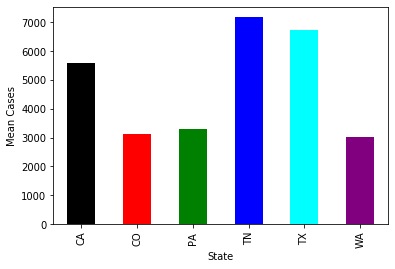

In [27]:
ax = df_cases_all['mean'].plot.bar(color = ['black', 'red', 'green', 'blue', 'cyan', 'purple'])
ax.set_ylabel('Mean Cases')
ax.set_xlabel('State')
plt.show()

Tennessee has the highest mean of cases, closely followed by Texas

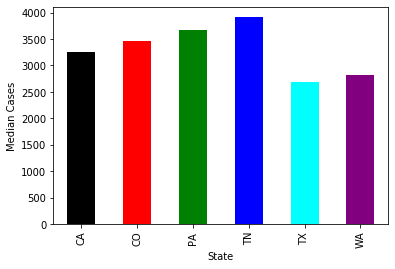

In [28]:
ax = df_cases_all['median'].plot.bar(color=['black', 'red', 'green', 'blue', 'cyan', 'purple'])
ax.set_ylabel('Median Cases')
ax.set_xlabel('State')
plt.show()

Tennessee has the highest median of cases

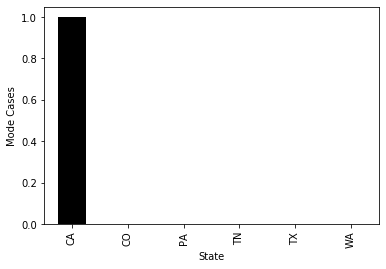

In [29]:
ax = df_cases_all['mode'].plot.bar(color = ['black', 'red', 'green', 'blue', 'cyan', 'purple'])
ax.set_ylabel('Mode Cases')
ax.set_xlabel('State')
plt.show()

California is the only State with a higher mode than zero

#### Plotting Deaths

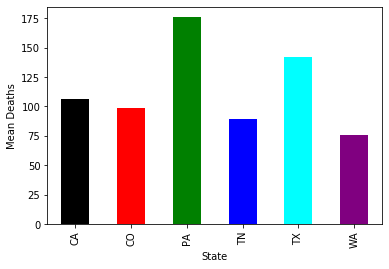

In [30]:
ax = df_deaths_all['mean'].plot.bar(color = ['black', 'red', 'green', 'blue', 'cyan', 'purple'])
ax.set_ylabel('Mean Deaths')
ax.set_xlabel('State')
plt.show()

Pennsylvania has the highest mean of deaths

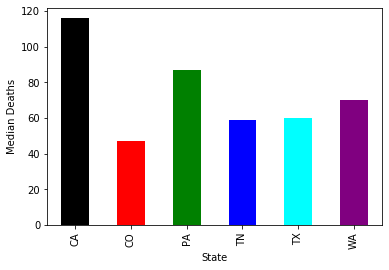

In [31]:
ax = df_deaths_all['median'].plot.bar(color=['black', 'red', 'green', 'blue', 'cyan', 'purple'])
ax.set_ylabel('Median Deaths')
ax.set_xlabel('State')
plt.show()

California has the highest median of deaths

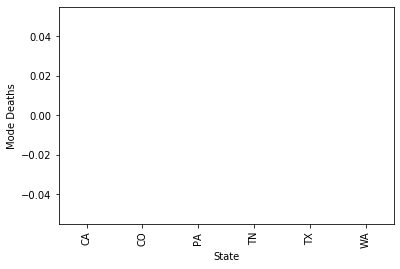

In [32]:
ax = df_deaths_all['mode'].plot.bar(color = ['black', 'red', 'green', 'blue', 'cyan', 'purple'])
ax.set_ylabel('Mode Deaths')
ax.set_xlabel('State')
plt.show()

Since the mode is zero, there is nothing to display

## Top Case and Death Rates in Pennsylvania

In [33]:
df_weekly_cases_normalized.sort_values(by = 'mean', ascending = False).head()

,mean,median,mode
Philadelphia County,6090.69,7060,0
Delaware County,5782.23,6782,0
Lehigh County,5116.06,6500,0
Northampton County,4867.23,6070,0
Berks County,4787.69,6027,0


We can see that the top 5 counties for cases are Philadelphia, Delaware, Lehigh, Northampton, and Berks Counties

In [34]:
df_weekly_deaths_normalized.sort_values(by = 'mean', ascending = False).head()

,mean,median,mode
Delaware County,447.2,538,0
Philadelphia County,384.229,451,0
Montgomery County,377.314,471,0
Lackawanna County,372.571,418,0
Bucks County,344.4,454,0


We can see that the top 5 counties for deaths are Delaware, Philadelphia, Montgomery, Lackawanna, and Bucks Counties

### Plot Daily Trends

In [35]:
df_penn_cases_summed = df_penn_cases.sum(axis = 0)
df_penn_deaths_summed = df_penn_deaths.sum(axis = 0)

Pennsylvania Cases

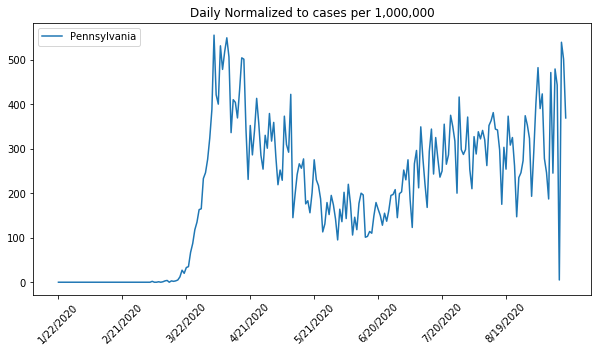

In [36]:
figure, axis = plt.subplots(1, figsize = (10,5))
axis.plot(df_penn_cases_summed, label = "Pennsylvania")
t = plt.xticks([col for col in df_penn_cases.columns[0:-1:30]])
axis.tick_params(axis = "x", rotation = 45)
axis.legend(loc = "upper left")
axis.title.set_text("Daily Normalized to cases per 1,000,000")
plt.show()

There is a case spike early in the year around April, and another spike towards the recent month of September

Pennsylvania Deaths

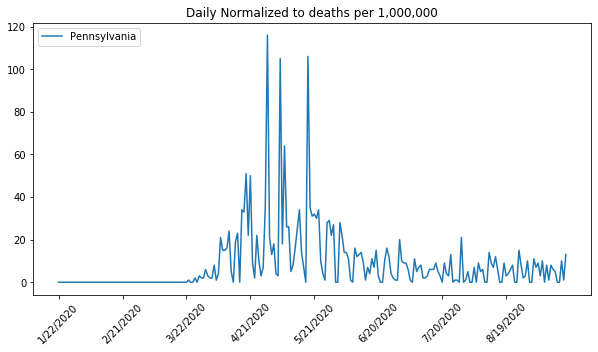

In [37]:
figure, axis = plt.subplots(1, figsize = (10,5))
axis.plot(df_penn_deaths_summed, label = "Pennsylvania")
t = plt.xticks([col for col in df_penn_deaths.columns[0:-1:30]])
axis.tick_params(axis = "x", rotation = 45)
axis.legend(loc = "upper left")
axis.title.set_text("Daily Normalized to deaths per 1,000,000")
plt.show()

#### Normalized County Plots

In [38]:
df_top_5_cases = pd.read_csv(top_5_cases)
df_top_5_deaths = pd.read_csv(top_5_deaths)

In [39]:
df_top_5_cases = df_top_5_cases.swapaxes("index", "columns")
df_top_5_deaths = df_top_5_deaths.swapaxes("index", "columns")

In [40]:
df_top_5_cases = df_top_5_cases.rename(columns=df_top_5_cases.iloc[0])
df_top_5_deaths = df_top_5_deaths.rename(columns=df_top_5_deaths.iloc[0])

In [41]:
df_top_5_cases = df_top_5_cases.drop(df_top_5_cases.index[0])
df_top_5_deaths = df_top_5_deaths.drop(df_top_5_deaths.index[0])

In [42]:
df_top_5_cases

,Berks County,Delaware County,Lehigh County,Northampton County,Philadelphia County
1/22/2020,0,0,0,0,0
1/23/2020,0,0,0,0,0
1/24/2020,0,0,0,0,0
...,...,...,...,...,...
9/14/2020,16,11,7,11,0
9/15/2020,13,8,4,6,12
9/16/2020,14,7,5,8,4


In [43]:
df_top_5_deaths

,Bucks County,Delaware County,Lackawanna County,Montgomery County,Philadelphia County
1/22/2020,0,0,0,0,0
1/23/2020,0,0,0,0,0
1/24/2020,0,0,0,0,0
...,...,...,...,...,...
9/14/2020,0,1,0,0,0
9/15/2020,0,0,0,0,0
9/16/2020,0,1,0,0,0


Cases By Day

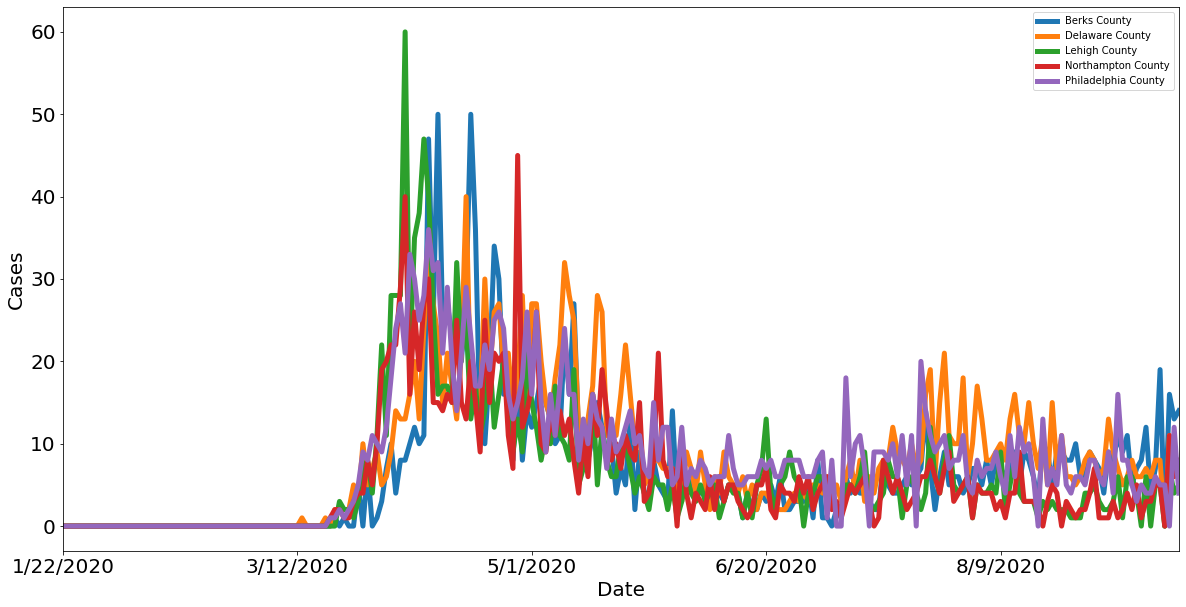

In [44]:
df_top_5_cases.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xlabel('Date', fontsize=20);

There is a case spike between April and June

Deaths By Day

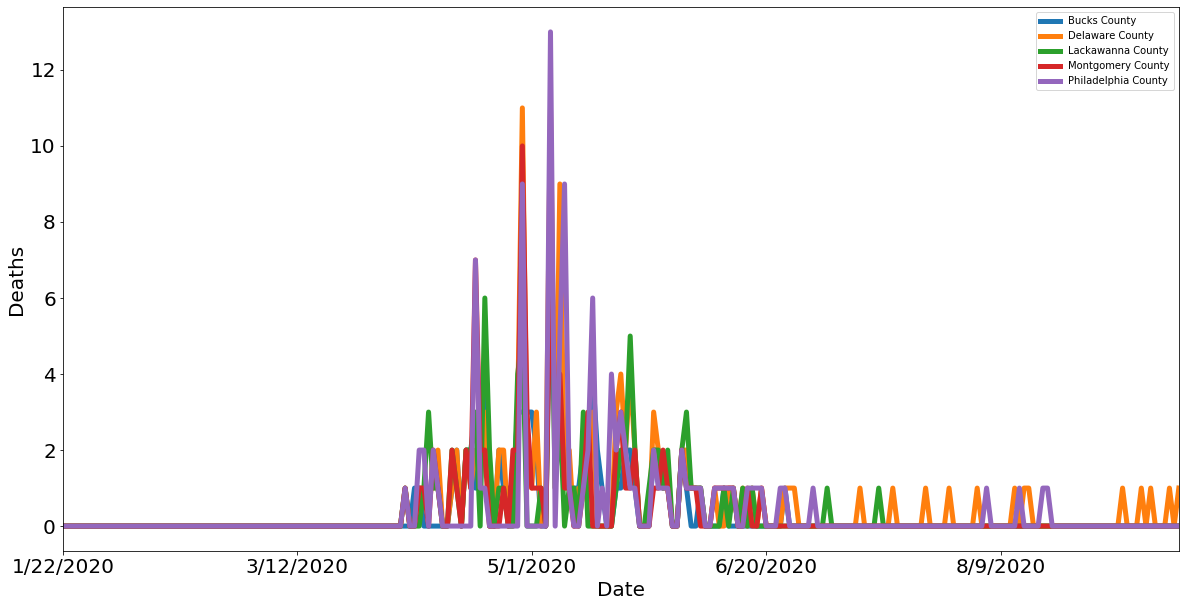

In [45]:
df_top_5_deaths.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Deaths', fontsize=20)
plt.xlabel('Date', fontsize=20);

There is a death spike between April and June which reflects the case spike

#### Aggregate Plots

Top Cases by County

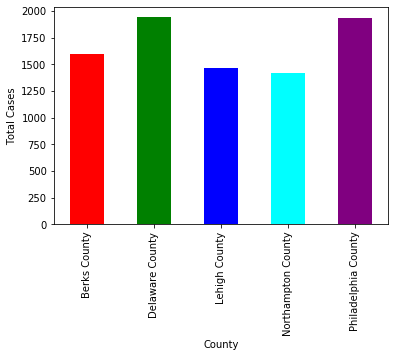

In [46]:
ax = df_top_5_cases.sum().plot.bar(color = ['red', 'green', 'blue', 'cyan', 'purple'])
ax.set_ylabel('Total Cases')
ax.set_xlabel('County')
plt.show()

Top Deaths by County

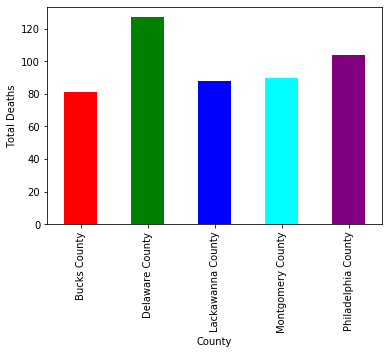

In [47]:
ax = df_top_5_deaths.sum().plot.bar(color = ['red', 'green', 'blue', 'cyan', 'purple'])
ax.set_ylabel('Total Deaths')
ax.set_xlabel('County')
plt.show()